In [1]:
# TDI: 12 day preparation: DAY 4

# Setup steps.

import pandas as pd
import numpy as np
import math

In [2]:
# Get data.

data_file_path = 'C:\Sidd\Python\Data_Incubator_12_Day\Energy_Cost_Savings.csv'
nyc_data = pd.read_csv(data_file_path)
nyc_data.describe()
nyc_data

,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,...,Savings from beginning receiving benefits,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,1 State Street,David Neiburg,eskoblo@energyspec.com,7186779077,1114 Avenue J,Brooklyn,NY,11230,Commercial,35 story building,...,349.78,Brooklyn,40.624784,-73.964920,314.0,44.0,534.0,3179818.0,3.067130e+09,Midwood
1,100 Church LLC,Edward A. Carroll,NaN,2125663000,100 Church Street,NY,NY,10007,Commercial,21 Floors,...,4423698.05,New York,40.712968,-74.009490,101.0,1.0,21.0,1001409.0,1.001250e+09,SoHo-TriBeCa-Civic Center-Little Italy
2,100 Wall Investments,Jerry Branam,NaN,2122487160,96 Wall Street,New York,NY,10005,Landlord,NaN,...,1814542.62,New York,40.705052,-74.007199,101.0,1.0,7.0,1000875.0,1.000380e+09,Battery Park City-Lower Manhattan
3,1-10 Bush Terminal Owner LP,Andrew Kimball,akimball@industrycity.com,3474178429,"220 36th St, Suite 2A",Brooklyn,NY,11232,Landlord,Special Eligible Premises for eligible businesses,...,6755.31,Brooklyn,40.656061,-74.007334,307.0,38.0,2.0,3398687.0,3.006950e+09,Sunset Park West
4,"120 Broadway Acquisitions JV, LLC (Ldmk)",Carl Letich,clettich@silvprop.com,2124064020,120 Broadway,New York,NY,10271,Commercial,NaN,...,3293055.08,New York,40.708546,-74.011041,101.0,1.0,7.0,1001026.0,1.000478e+09,Battery Park City-Lower Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,"WONTON FOOD, INC.",DONALD LAU,donaldlau@wontonfood.com,7186286868,220-222 MOORE STREET,Brooklyn,NY,11206,Manufacturing,"MFG. PASTA, EGGROLL SKINS",...,965843.58,Brooklyn,40.704425,-73.936010,301.0,34.0,485.0,3071539.0,3.031090e+09,Bushwick South
446,Wood Works,Gordon Brawm,brawnworks@gmail.com,9179404950,162 Cook Street,Brooklyn,NY,11206,Manufacturing,Installer of wood furniture,...,3585.40,Brooklyn,40.702869,-73.936466,301.0,34.0,485.0,3071625.0,3.031230e+09,Bushwick South
447,"WorldWide Plumbing Supply, Inc.",Surie Lefkowitz,sheidya@wwps.com,7188533002,125 Lake Avenue,Staten Island,NY,10303,Manufacturing,"Plumbing Fixtures, Parts & Supplies, Plumbers",...,20487.73,Staten Island,40.633518,-74.150942,501.0,49.0,239.0,5107122.0,5.011610e+09,Mariner's Harbor-Arlington-Port Ivory-Granitev...
448,WUD Furniture LLC,Keren Springer,keren@wudfurniture.com,7184867952,1102 Atlantic Avenue,Brooklyn,NY,11238,Manufacturing,"We make handcrafted furniture, surfaces, lighting",...,12287.32,Brooklyn,40.679518,-73.956819,308.0,35.0,305.0,3027572.0,3.011260e+09,Crown Heights North


In [3]:
# 1. How many different companies are represented in the data set?

all_company_names = nyc_data['Company Name']
unique_names = set(all_company_names)
num_unique_companies = len(unique_names)
print(num_unique_companies)

# What are the column names.
# nyc_data.columns


439


In [4]:
# 2. What is the total number of jobs created for businesses in Queens?

# Get all boro names.
all_boros = nyc_data.City
# print(all_boros)

queens_data = nyc_data.loc[nyc_data.City=='Queens']
# What are the column names.
# nyc_data.columns
jobs_created = queens_data['Job created']
np.nansum(jobs_created)


90.0

In [5]:
# #  Idiot check.
# pd.set_option('display.max_rows', 500)
# jobs_created


In [7]:
# 3. How many different unique email domains names are there in the data set?

# What are the column names.
# nyc_data.columns

all_company_emails = nyc_data['company email']
# all_company_emails
nn=len(all_company_emails)
all_domains = []
nn

for i in range(0,nn):
    # print(i)
    this_email = all_company_emails[i]
    # print(this_email)
    if type(this_email) == str:
        if '@' in this_email:
            this_domain = this_email.split("@",1)[1]
            all_domains.append(this_domain)

unique_domains = set(all_domains)
# print(len(all_domains))
print(len(unique_domains))


356


In [8]:
# Test/debug code ONLY!

# a = 'this@that.com'
# b = a.split("@",1)[1]
# c = print(b.split(".",1)[0])

In [9]:
# Test/debug code ONLY!

# my_string="hello python world , i'm a beginner"
# print(my_string.split("world",1)[1])

In [10]:
# Test code ONLY!

# all_company_emails

In [11]:
# Test/debug code ONLY!

# for i in range(0,nn):
#     print(i)

In [12]:
# 4. Considering only NTAs with at least 5 listed businesses, what is the average total savings 
# and the total jobs created for each NTA? 

# nyc_data.columns

all_NTA = list(nyc_data['NTA'])
unique_NTA = list(set(all_NTA))
all_savings = list(nyc_data['Total Savings'])

num_unique_NTA = len(unique_NTA)
# print(num_unique_NTA)

all_savings = list(nyc_data['Total Savings'])
all_jobs_created = list(nyc_data['Job created'])

count_store=[]
include_idx=[]
all_mean=[]
all_jobs=[]

for j in range(0,num_unique_NTA):
    if type(unique_NTA[j]) == str:
        num_count = all_NTA.count(unique_NTA[j])
        if num_count >4:
            include_idx.append(j)
            count_store.append(num_count)
            this_NTA_indices = [i for i, e in enumerate(all_NTA) if e == unique_NTA[j]]
            this_NTA_Data = nyc_data.loc[this_NTA_indices]
            all_mean.append(np.mean(list(nyc_data.loc[this_NTA_indices]['Total Savings'])))
            all_jobs.append(np.nansum(list(nyc_data.loc[this_NTA_indices]['Job created'])))
            
# print(include_idx)
# print(count_store)
# print(include_idx)

# Kluge for adding headers to list when saving as csv.
all_mean = ['mean'] + all_mean
all_jobs = ['total jobs'] + all_jobs

# Lookit.
print(all_mean)
print(all_jobs)

# Format for saving to csv.
out_data = zip(all_mean,all_jobs)


['mean', 37214.024, 6658.283333333334, 13990.626363636366, 39246.016153846154, 17757.662, 17843.937857142857, 14327.419333333331, 17159.372857142855, 4036.298888888889, 59950.340000000004, 26140.455, 11227.155714285715, 61830.770625, 24337.390000000003, 9753.649285714286, 14316.976875, 23931.398933333334, 469890.79666666663, 48433.09333333333, 2760.8888888888887]
['total jobs', 0.0, 10.0, 0.0, 12.0, 0.0, 10.0, 0.0, 2.0, 0.0, 0.0, 10.0, 20.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 0.0]


In [13]:
# 5. Save your result for the previous question as a CSV file.
# Save as csv
import csv
newfilePath = 'C:\Sidd\Python\Data_Incubator_12_Day\TDI_4_5.csv'
with open(newfilePath, "w") as f:
    writer = csv.writer(f)
    for row in out_data:
        writer.writerow(row)


In [14]:
# Code for testing and rebugging ONLY!

# data_file_path = 'C:\Sidd\Python\Data_Incubator_12_Day\TDI_4_5.csv'
# sidd_output = pd.read_csv(data_file_path)
# # sidd_output.describe()
# sidd_output

# all_mean = ['mean'] + all_mean
# all_mean

In [15]:
# Code for testing and rebugging ONLY!

# print(np.nansum(all_jobs_created))
# print(np.nansum(all_jobs))

# list(nyc_data.loc[this_NTA_indices]['Job created'])
# nyc_data.columns
# include_idx

In [16]:
# Code for testing and rebugging ONLY!

# aa = ['a','b','c','d','a','a','a']
# [i for i, e in enumerate(aa) if e == 'a']

In [17]:
# Code for testing and rebugging ONLY!

# this_NTA_indices = [i for i, e in enumerate(all_NTA) if e == unique_NTA[7]]
# this_NTA_indices

In [18]:
# Code for testing and rebugging ONLY!

# all_NTA[438]

In [19]:
# Code for testing and rebugging ONLY!

# all_savings = list(nyc_data['Total Savings'])
# len(all_savings)

In [20]:
# Code for testing and rebugging ONLY!

# np.mean(list(nyc_data.loc[this_NTA_indices]['Total Savings']))

In [21]:
# Code for testing and rebugging ONLY!

# this_NTA_indices

In [28]:
# TDI: 12 day preparation: DAY 5

# Setup steps.

import pandas as pd
import numpy as np
import math
import matplotlib as mpl
import matplotlib.pyplot as plt

In [29]:
data_file_path = 'C:\Sidd\Python\Data_Incubator_12_Day\Energy_Cost_Savings.csv'
nyc_data = pd.read_csv(data_file_path)
# nyc_data.describe()
# nyc_data
nyc_data.columns


Index(['Company Name', 'company contact', 'company email', 'company phone',
       'Address', 'City', 'State', 'Postcode', 'Industry', 'Industry descr',
       'Company Type', 'Current fulltime', 'Job created', 'Job retain',
       'Effective Date', 'Total Savings',
       'Savings from beginning receiving benefits', 'Borough', 'Latitude',
       'Longitude', 'Community Board', 'Council District', 'Census Tract',
       'BIN', 'BBL', 'NTA'],
      dtype='object')

450
450


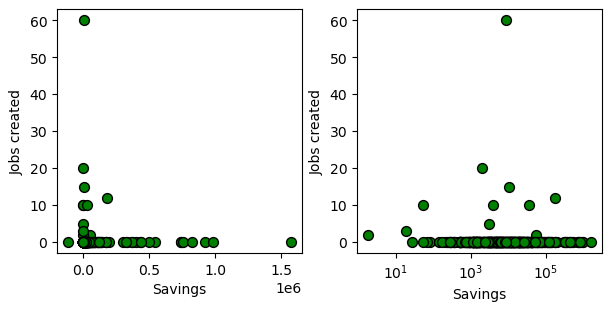

In [30]:
# 2. Create scatter plot of jobs created versus average savings. Use both a standard and 
# a logarithmic scale for the average savings. 

savings = nyc_data['Total Savings']
savings = [0 if np.isnan(i) else i for i in savings]

jobs = nyc_data['Job created']
jobs = [0 if np.isnan(i) else i for i in jobs]

print(len(jobs))
print(len(savings))

fig, axs = plt.subplots(1, 2, figsize=(6, 3), layout='constrained')
# fig, ax = plt.subplots(figsize=(5, 2.7))
axs[0].scatter(savings,jobs,s=50,facecolor='g',edgecolor='k')
axs[0].set_ylabel('Jobs created')
axs[0].set_xlabel('Savings')

axs[1].scatter(savings,jobs,s=50,facecolor='g',edgecolor='k')
axs[1].set_ylabel('Jobs created')
axs[1].set_xlabel('Savings')
axs[1].set_xscale('log')



Text(0.5, 1.0, 'Savings')

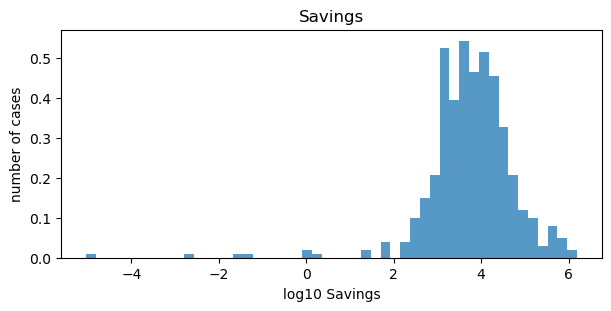

In [32]:
# # Create histogram of the log of the average total savings.

log_savings_all = []

for thisnum in savings:
    if thisnum > 0:
        log_savings = np.log10(thisnum)
    if thisnum < 0:
        log_savings = -np.log10(-thisnum)
    if thisnum == 0:
        log_savings = 0
    log_savings_all.append(log_savings)

# # the histogram of the data
# n, bins, patches = axs.hist(log_savings_all, 50, density=True, facecolor='C0', alpha=0.75)

fig, axs = plt.subplots(figsize=(6, 3), layout='constrained')
n, bins, patches = axs.hist(log_savings_all, 50, density=True, facecolor='C0', alpha=0.75)

axs.set_xlabel('log10 Savings')
axs.set_ylabel('number of cases')
axs.set_title('Savings')


Text(0, 0.5, 'total jobs created')

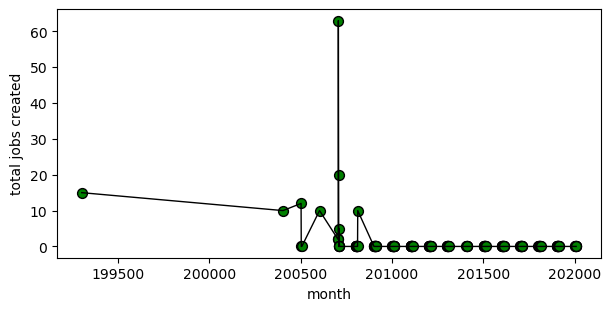

In [36]:
# 3. Line plot of the total jobs created for each month.

years=[]

jobs = nyc_data['Job created']
jobs = [0 if np.isnan(i) else i for i in jobs]
dates = nyc_data['Effective Date']

for date in dates:
    # print(date)
    years.append(int(date[6:]+date[0:2]))

uniq_years=set(years)
all_jobs=[]
for month in uniq_years:
    ind = -1
    num_jobs=0
    for date in dates:
        ind = ind+1
        nj=jobs[ind]
        if int(date[6:]+date[0:2]) == month:
            num_jobs+=nj
    all_jobs.append(num_jobs)

xx = list(uniq_years)
yy = all_jobs

yy_sorted = [x for _,x in sorted(zip(xx,yy))]
xx_sorted = np.sort(xx)
fig, axs = plt.subplots(figsize=(6, 3), layout='constrained')
axs.plot(xx_sorted,yy_sorted, color='black', linewidth=1, linestyle='-')
axs.scatter(xx_sorted,yy_sorted,s=50,facecolor='g',edgecolor='k')

# print(xx_sorted)
# print(yy_sorted)
axs.set_xlabel('month')
axs.set_ylabel('total jobs created')



In [35]:
# Code for testing and rebugging ONLY!

# print(xx_sorted)

# print(yy_sorted)


[199302 200403 200502 200503 200506 200603 200704 200705 200706 200707
 200708 200709 200710 200711 200712 200801 200802 200803 200804 200805
 200806 200807 200808 200809 200810 200811 200812 200901 200902 200903
 200904 200906 200907 200908 200909 200910 200911 200912 201001 201002
 201003 201004 201005 201006 201007 201008 201009 201010 201011 201012
 201101 201102 201103 201104 201105 201106 201107 201109 201110 201111
 201112 201201 201202 201203 201204 201205 201206 201208 201210 201211
 201212 201301 201302 201303 201304 201305 201306 201307 201312 201407
 201408 201409 201411 201412 201501 201502 201503 201505 201506 201507
 201510 201511 201512 201601 201602 201603 201604 201605 201606 201607
 201609 201610 201611 201612 201701 201702 201703 201705 201706 201707
 201708 201710 201711 201712 201801 201802 201803 201804 201806 201808
 201810 201811 201812 201901 201902 201903 201904 201905 201906 201907
 201908 201910 201911 201912 202002 202003 202004 202005 202006 202007]
[15.0

In [37]:
# Code for testing and rebugging ONLY!

# all_jobs_created

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 10.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 60.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 5.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 12.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 10.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
